Revis√£o dos Dados

In [3]:
import pandas as pd

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';', encoding='utf-8')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   risp                      19 non-null     int64  
 1   total_crimes              19 non-null     int64  
 2   latitude                  19 non-null     float64
 3   longitude                 19 non-null     float64
 4   populacao                 19 non-null     int64  
 5   renda_media               19 non-null     float64
 6   idh_medio                 19 non-null     float64
 7   taxa_de_analfabetismo(%)  19 non-null     float64
 8   esperan√ßa_vida            19 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 1.5 KB
None


risp  total_crimes  latitude  longitude  populacao  renda_media  idh_medio  \
0     1           156  -19.9167   -43.9345    2315560     3341.200      0.810   
1     2          2808  -19.7668   -44.0868    1905395     1305.202      0.695   
2     3          2808  -19.6944   -43.9237     988106     1495.460      0.715   
3     4         13416  -21.7642   -43.3496    1574197     1150.620      0.673   
4     5          4680  -19.7479   -47.9319     823093     1603.200      0.712   

   taxa_de_analfabetismo(%)  esperan√ßa_vida  
0                     2.220          76.370  
1                     3.881          75.297  
2                     3.599          75.464  
3                     4.880          74.831  
4                     4.643          76.479

Estat√≠sticas Descritivas

In [4]:
import pandas as pd

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';', encoding='utf-8')

df.describe().T

count          mean            std          min  \
risp                       19.0  1.000000e+01       5.627314       1.0000   
total_crimes               19.0  7.003579e+03    4259.525252     156.0000   
latitude                   19.0 -1.962876e+01       1.600327     -22.2300   
longitude                  19.0 -4.470571e+01       1.879590     -48.2755   
populacao                  19.0  1.068967e+06  517493.594817  377579.0000   
renda_media                19.0  1.289073e+03     569.881286     663.0300   
idh_medio                  19.0  6.851053e-01       0.044920       0.6070   
taxa_de_analfabetismo(%)   19.0  6.281000e+00       3.417590       2.2200   
esperan√ßa_vida             19.0  7.479705e+01       1.209942      72.4720   

                                  25%          50%           75%           max  
risp                           5.5000      10.0000  1.450000e+01  1.900000e+01  
total_crimes                2808.0000    7800.0000  9.438000e+03  1.513200e+04  
latitude                     -20.6851     -19.6944 -1.888365e+01 -1.635950e+01  
longitude                    -46.1271     -44.2469 -4.381575e+01 -4.150590e+01  
populacao                 710346.0000  988106.0000  1.305146e+06  2.315560e+06  
renda_media                 1004.0015    1238.8800  1.454088e+03  3.341200e+03  
idh_medio                      0.6625       0.6950  7.070000e-01  8.100000e-01  
taxa_de_analfabetismo(%)       4.1725       5.1570  6.949000e+00  1.603300e+01  
esperan√ßa_vida                74.0535      75.2850  7.563800e+01  7.647900e+01

Correla√ß√£o entre vari√°veis

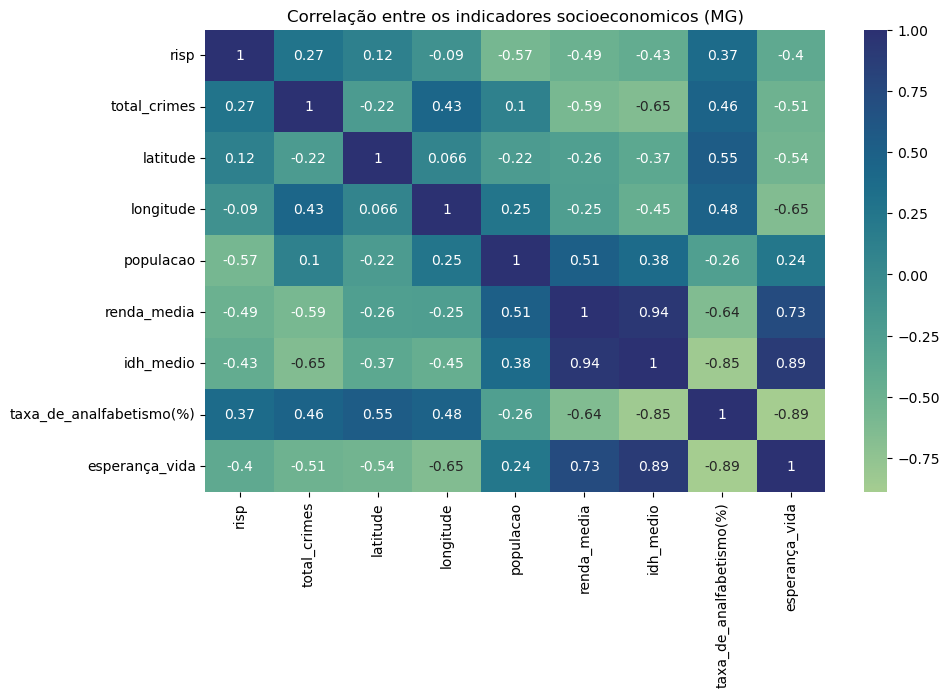

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';', encoding='utf-8')

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='crest')
plt.title("Correla√ß√£o entre os indicadores socioeconomicos (MG)")
plt.show()

O gr√°fico exibe a correla√ß√£o entre todas as vari√°veis num√©ricas do seu dataset, ou seja, como uma vari√°vel se relaciona com outra.

Insights importantes que s√£o possiveis de se tirar:

-> Quando o **IHD (√çndice de Desenvolvimento Humano)** aumenta, o **n√∫mero de crimes violentos** diminui, a **renda m√©dia** √© maior, a **taxa de analfabetismo** √© menor e a **esperan√ßa de vida √© maior**.

-> O n√∫mero de crimes violentos em uma regi√£o √© um indicador de outros problemas, uma vez que, quando ele aumenta, o **IDH** diminui, a **renda m√©dia** da regi√£o diminui, a **esperan√ßa de vida** diminui e a **taxa de analfabetismo** aumenta  



Cria√ß√£o de um mapa de calor com numero de crimes por regi√£o

In [17]:
import folium
from folium.plugins import HeatMap

df = pd.read_csv('../data/processado/crimes_por_regiao.csv', sep=';')

mapa = folium.Map(location= [-18.472096, -44.353396], zoom_start= 6)
coords = list(zip(df.latitude, df.longitude))
mapaCalor = HeatMap(coords, radius=60, blur=50)
mapa.add_child(mapaCalor)

mapa 

mapa.save('../src/mapa_calor_crimes_MG.html')

| Cor             | Crit√©rio                                              | Interpreta√ß√£o                                                                                                              |
| --------------- | ----------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| üî¥ **Vermelho** | RISP com **maior n√∫mero de crimes**  | Regi√µes **mais cr√≠ticas**, onde h√° **maior incid√™ncia criminal** e, possivelmente, **piores indicadores socioecon√¥micos**. |
| üîµ **Azul**    | RISP com **menor n√∫mero de crimes** | Regi√µes **mais est√°veis ou seguras**, geralmente com **melhores √≠ndices de renda, IDH e educa√ß√£o**.                        |


Mapa de calor das regi√µes mais cr√≠ticas

In [16]:
import folium

m = folium.Map(location=[-18.5, -44.5], zoom_start=6)
df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=f"RISP {row['risp']}<br>Crimes: {row['total_crimes']}<br>IDH: {row['idh_medio']}",
        color='red' if row['total_crimes'] > df['total_crimes'].mean() else 'green',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

m

m.save('../src/mapa_criminalidade_risp.html')


| Cor             | Crit√©rio                                              | Interpreta√ß√£o                                                                                                              |
| --------------- | ----------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| üî¥ **Vermelho** | RISP com **total de crimes acima da m√©dia estadual**  | Regi√µes **mais cr√≠ticas**, onde h√° **maior incid√™ncia criminal** e, possivelmente, **piores indicadores socioecon√¥micos**. |
| üü¢ **Verde**    | RISP com **total de crimes abaixo da m√©dia estadual** | Regi√µes **mais est√°veis ou seguras**, geralmente com **melhores √≠ndices de renda, IDH e educa√ß√£o**.                        |


Identifica√ß√£o dos principais agentes de impacto sobe o n√∫mero de crimes violentos

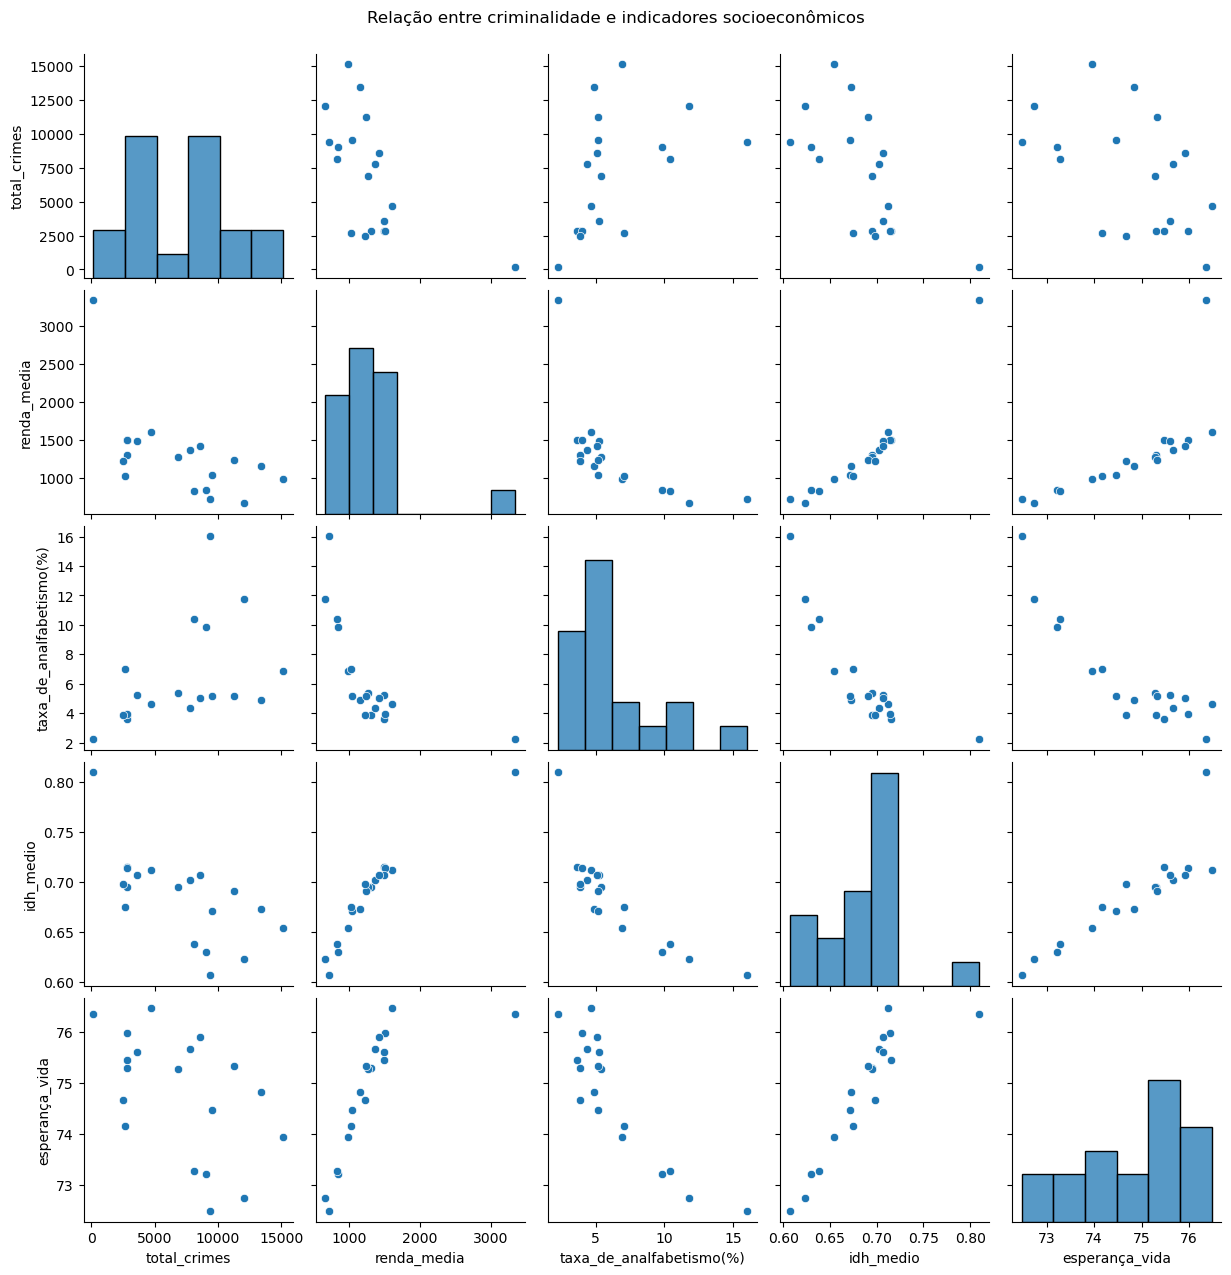

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

sns.pairplot(df, vars=['total_crimes', 'renda_media', 'taxa_de_analfabetismo(%)', 'idh_medio', 'esperan√ßa_vida'])
plt.suptitle('Rela√ß√£o entre criminalidade e indicadores socioecon√¥micos', y=1.02)
plt.show()


O gr√°fico de dispers√£o m√∫ltipla (pairplot) mostra como vari√°veis como renda m√©dia, taxa de analfabetismo, IDH e esperan√ßa de vida se relacionam com o n√∫mero total de crimes em cada RISP.

Cada ponto representa uma regi√£o (RISP), e a disposi√ß√£o dos pontos permite observar tend√™ncias. Se o aumento ou redu√ß√£o de um fator est√° associado ao aumento ou redu√ß√£o da criminalidade.

| Compara√ß√£o                                  | Tend√™ncia visual                     | Interpreta√ß√£o                                                                                                                                                                                                                                                |
| ------------------------------------------- | ------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **total_crimes √ó renda_media**              | Tend√™ncia **decrescente**            | RISPs com **maior renda m√©dia** tendem a registrar **menos crimes**. A renda atua como fator de prote√ß√£o social, reduzindo a vulnerabilidade e o envolvimento com atividades il√≠citas.                                                                       |
| **total_crimes √ó taxa_de_analfabetismo(%)** | Tend√™ncia **crescente**              | √Ä medida que o **analfabetismo aumenta**, o n√∫mero de crimes tamb√©m cresce. Isso indica que a **baixa escolaridade** est√° associada a **maior incid√™ncia criminal**, possivelmente por limitar o acesso ao mercado de trabalho e aumentar a exclus√£o social. |
| **total_crimes √ó idh_medio**                | Tend√™ncia **fortemente decrescente** | O **IDH** tem uma das **rela√ß√µes mais negativas** com a criminalidade. Regi√µes com **melhor educa√ß√£o, renda e sa√∫de** apresentam **menores √≠ndices de crimes**, refor√ßando a influ√™ncia do desenvolvimento humano sobre a seguran√ßa p√∫blica.                 |
| **total_crimes √ó esperan√ßa_vida**           | Tend√™ncia **levemente decrescente**  | Regi√µes com **maior expectativa de vida** costumam ter **menos crimes**, o que sugere que **melhores condi√ß√µes de vida** e **acesso √† sa√∫de** tamb√©m est√£o associadas a ambientes mais seguros.                                                              |


Com isso √© possivel concluir que **Educa√ß√£o e Renda** s√£o os **principais fatores** de impacto sobre a criminalidade nas RISPs.

O **IDH** e a **renda m√©dia** mostram correla√ß√µes negativas fortes, ou seja, **quanto mais desenvolvida √© a regi√£o, menor a incid√™ncia criminal.**

**Esperan√ßa de vida refor√ßa o padr√£o**: melhor qualidade de vida ‚Üí menor criminalidade.

Identifica√ß√£o dos principais agentes de impacto sobre o IDH

C:\Users\Meu computador\AppData\Local\Temp\ipykernel_10048\913881963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_idh.values, y=corr_idh.index, palette='crest')


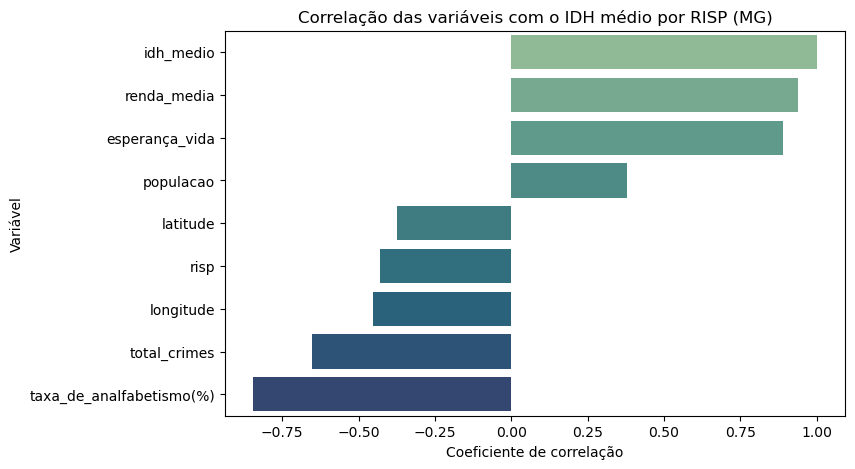

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

corr_idh = df.corr(numeric_only=True)['idh_medio'].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_idh.values, y=corr_idh.index, palette='crest')
plt.title('Correla√ß√£o das vari√°veis com o IDH m√©dio por RISP (MG)')
plt.xlabel('Coeficiente de correla√ß√£o')
plt.ylabel('Vari√°vel')
plt.show()


Valores pr√≥ximos de +1 = aumentam junto com o IDH (ex: renda, esperan√ßa de vida).

Valores pr√≥ximos de ‚Äì1 = diminuem quando o IDH aumenta (ex: analfabetismo, crimes).

Rela√ß√µes Diretas dos indicadores socioecon√¥micos com o IDH

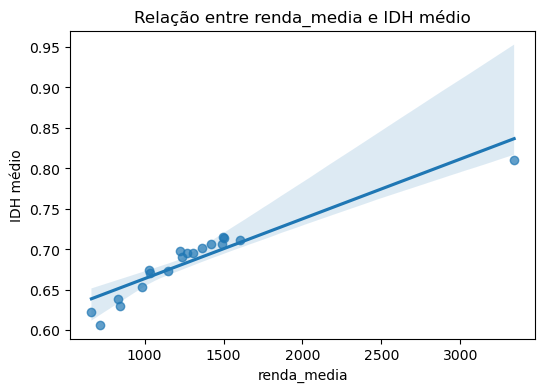

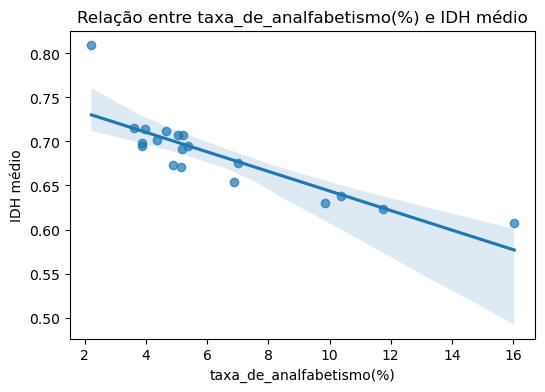

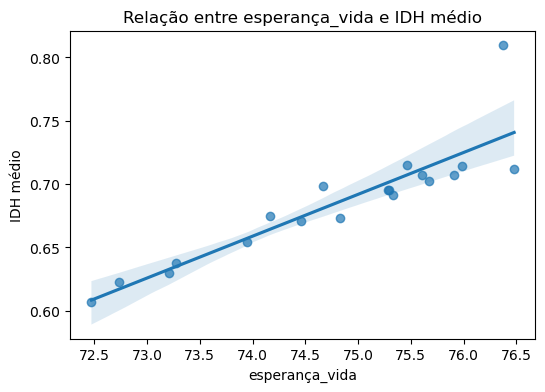

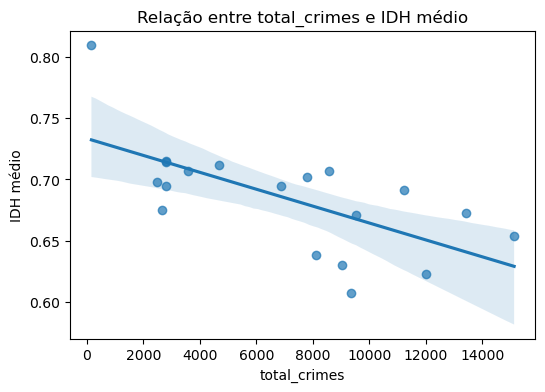

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

variaveis = ['renda_media', 'taxa_de_analfabetismo(%)', 'esperan√ßa_vida', 'total_crimes']

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.regplot(x=var, y='idh_medio', data=df, scatter_kws={'alpha':0.7})
    plt.title(f'Rela√ß√£o entre {var} e IDH m√©dio')
    plt.ylabel('IDH m√©dio')
    plt.show()

Renda m√©dia = tend√™ncia crescente: quanto maior a renda, maior o IDH.

Taxa de analfabetismo = tend√™ncia decrescente: regi√µes com mais analfabetismo t√™m menor IDH.

Esperan√ßa de vida = tend√™ncia fortemente crescente.

Total de crimes = tend√™ncia levemente decrescente, indicando que maior IDH tende a estar ligado a menor criminalidade.